<a href="https://colab.research.google.com/github/codefinn9988/Ml_learn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# CNN
#1. LeNet5 architecture using MNIST dataset
#2. AlexNet architecture using CIFAR-10 dataset

In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [4]:
train_data =  datasets.MNIST(root="data",
                           train=True,
                           transform= ToTensor(),#transfrom pil image to tensor
                           target_transform=None,
                            download=True)
test_data =datasets.MNIST(root="data",
                           train=False,
                           transform= ToTensor(),
                            download=True)

train_data,test_data

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.15MB/s]


(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
image.shape

torch.Size([1, 28, 28])

In [7]:
# .data = pixel values  .targets = label
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape: torch.Size([1, 28, 28])


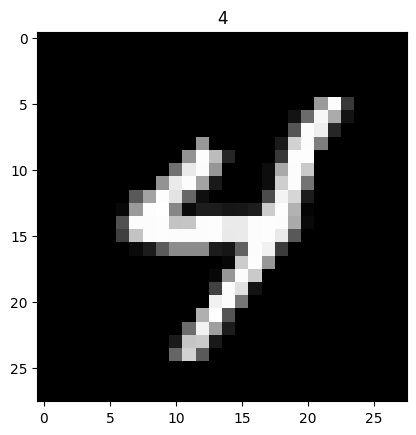

In [9]:
image, label = train_data[115]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label);

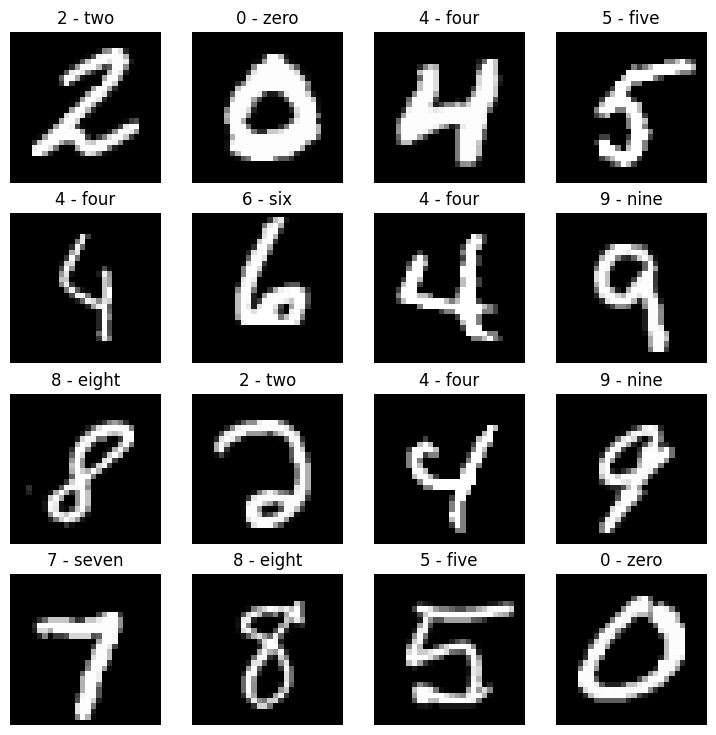

In [10]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols +1):
    random_idx = torch.randint(0,len(train_data),size =[1]).item()
    img,label =train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False); # no x-axis and y-axis


In [11]:
# DataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=32,shuffle =True)
test_dataloader =DataLoader(test_data,batch_size=32,shuffle =True)


In [12]:
train_features ,train_labels =next(iter(train_dataloader))
train_features.size(),train_labels.size() #32 is a batch
#NCHW n->number of image c -> color channel 1(grayscale)

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [13]:
# Build the CNN Model
# Lets use  LeNet Architecture
# image(28*28) -> conv(5*5) pad=2 ->avg pool(2*2) stride=2
#  -> conv(5*5) ->avg pool(2*2) stride=2-> fC(fully connectd)(120)->
# FC(84) -> FC(10)
#


In [14]:
class LeNet5(nn.Module):
  def __init__(self,input_shape:int,hidden_unit:int,output_shape:int):
    super().__init__()
  # nn.Sequential = stack neural network layers in sequence.
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=5,
                  padding=2
                  ),
        nn.ReLU(),
        #2*2
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    # After maxPool2d 28x28 -> 14x14.

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=5
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )


    #  output_size = (W - kernel_size + 1) -> 14 - 5 + 1 = 10.
    # 10x10 -> 5x5.

    self.classifier = nn.Sequential(
        nn.Flatten(),
# Input features = (output channels from block_2) * (width * height after pooling)
        nn.Linear(in_features=hidden_unit*5*5,out_features=120),
        nn.ReLU(),
        nn.Linear(in_features=120,out_features=84),
        nn.ReLU(),
        nn.Linear(in_features=84,out_features=output_shape)

    )

  def forward(self,x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x= self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = LeNet5(input_shape=1,
                 hidden_unit=10,
                 output_shape=len(class_names)).to(device)
model_0

LeNet5(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=120, bias=True)
    (2): ReLU()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [15]:
# Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss() #  for Multi-Class Classification
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [16]:
# Accuracy Function
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  # print(correct)
  acc = (correct/len(y_pred))*100
  return acc


In [17]:
# Functionizing training and test loops

def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn):

  train_loss, train_acc = 0,0
  for batch ,(X,y) in enumerate(data_loader):
    X,y= X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate loss
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    # argmax -> Returns the indices of the maximum value of all elements in the input tensor.
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1)) # convert raw logits to predicated class label

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /=len(data_loader) # avg
  train_acc /=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model(X)
      # 2. Calculate loss and accuracy
      loss = loss_fn(test_pred,y)
      test_loss +=loss
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /=len(data_loader) # avg
    test_acc /=len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [18]:
# Training and testing
torch.manual_seed(42)

epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)



Epoch: 0
---------
Train loss: 1.54391 | Train accuracy: 47.68%
Test loss: 0.31189 | Test accuracy: 90.62%
Epoch: 1
---------
Train loss: 0.23158 | Train accuracy: 92.92%
Test loss: 0.15433 | Test accuracy: 95.17%
Epoch: 2
---------
Train loss: 0.13683 | Train accuracy: 95.78%
Test loss: 0.10214 | Test accuracy: 96.85%


In [19]:
#CIFAR-10 using AlexNet architecture.

In [20]:
from torchvision import transforms
mean =[0.4914, 0.4822, 0.4465]
std =[0.2023, 0.1994, 0.2010]
transform_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.RandomRotation(15),
    transforms.Normalize(mean=mean,
                         std=std)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std
)])

In [21]:
train_cifar_data = datasets.CIFAR10(root="data",
                                        train=True,
                                        transform=transform_train,
                                        download = True)

test_cifar_data = datasets.CIFAR10(root = "data",
                                       train=False,
                                       transform=transform_test,
                                       download=True)
train_cifar_data,test_cifar_data

100%|██████████| 170M/170M [00:05<00:00, 30.8MB/s]


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                RandomCrop(size=(32, 32), padding=4)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
            ))

In [22]:
image_cifar,label_cifar= train_cifar_data[0]
image_cifar,label_cifar

(tensor([[[-2.4291, -2.4291, -1.1497,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291, -0.4518,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291,  0.1685,  ..., -0.0253,  0.0328, -0.4518],
          ...,
          [-2.4291, -2.4291, -2.4291,  ...,  1.0021, -2.4291, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],
 
         [[-2.4183, -2.4183, -1.4939,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -0.9629,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -0.5499,  ..., -0.9039, -0.8646, -1.1399],
          ...,
          [-2.4183, -2.4183, -2.4183,  ...,  0.4138, -2.4183, -2.4183],
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],
 
         [[-2.2214, -2.2214, -1.6361,  ..., -2.2214, -2.2214, -2.2214],
          [-2.2214, -2.2214,

In [23]:
image_cifar.shape

torch.Size([3, 32, 32])

In [24]:
len(train_cifar_data.data), len(train_cifar_data.targets),len(test_cifar_data.data),len(test_cifar_data.targets)

(50000, 50000, 10000, 10000)

In [25]:
cifar_class_names = train_cifar_data.classes
cifar_class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

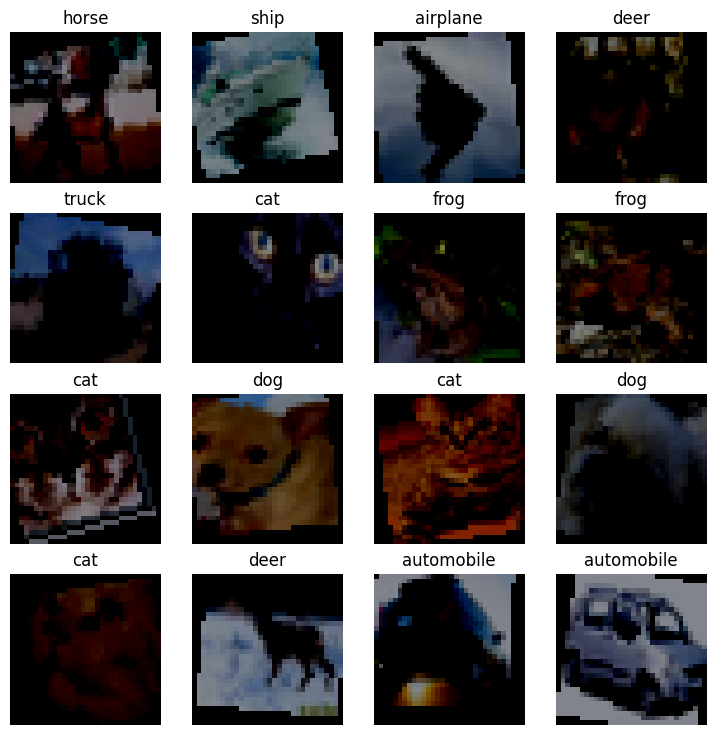

In [26]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols +1):
    random_idx = torch.randint(0,len(train_cifar_data),size =[1]).item()

    img,label =train_cifar_data[random_idx]

    #Denormalize the data
    img_denormalized = img.clone()
    for t,m,s in zip(img_denormalized,mean,std):
      t.mul_(s).add(m)
    img_denormalized = torch.clamp(img_denormalized,0,1)

    fig.add_subplot(rows, cols, i)
    plt.imshow(torch.permute(img_denormalized,(1,2,0)))
    plt.title(cifar_class_names[label])
    plt.axis(False); # no x-axis and y-axis

In [27]:
from torch.utils.data import DataLoader
cifar_train_dataloader =DataLoader(train_cifar_data,batch_size = 16,shuffle=True)
cifar_test_dataloader = DataLoader(test_cifar_data,batch_size=16,shuffle=True)


In [28]:
cifar_train_features , cifar_test_labels = next(iter(cifar_train_dataloader))
cifar_train_features.size(), cifar_test_labels.size()

(torch.Size([16, 3, 32, 32]), torch.Size([16]))

In [29]:
class AlexNet(nn.Module):
  def __init__(self,num_classes:int = 10):
    super().__init__()

    # bloack 1
    self.block_1 = nn.Sequential(
        nn.Conv2d(
        in_channels=3,
        out_channels =64,
        kernel_size=3,
        stride = 1,
        padding = 1
        ),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size= 2, stride =2)
    )

    # block 2
    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels= 64,
            out_channels= 192,
            kernel_size= 5,
            padding = 2,
        ),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(192),
        nn.MaxPool2d(kernel_size=3 , stride= 2)
    )

    # block 3
    self.block_3 = nn.Sequential(
        nn.Conv2d(
          in_channels= 192,
          out_channels= 384,
          kernel_size= 3,
          padding = 1,
        ),
        nn.BatchNorm2d(384),
        nn.ReLU(inplace=True),
        nn.Conv2d(
          in_channels= 384,
          out_channels= 256,
          kernel_size= 3,
          padding = 1,
        ),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.Conv2d(
          in_channels= 256,
          out_channels=256 ,
          kernel_size= 3,
          padding = 1,
        ),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2)
    )

    #nn
    self.avgpool = nn.AdaptiveAvgPool2d((6,6))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=256*6*6,out_features=512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=512,out_features=256),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=256, out_features=num_classes)

    )

  def forward(self,x:torch.Tensor):
      x = self.block_1(x)
      x= self.block_2(x)
      x = self.block_3(x)
      x = self.avgpool(x)
      x= self.classifier(x)
      return x


model_alex = AlexNet(num_classes=len(cifar_class_names)).to(device)

model_alex

AlexNet(
  (block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [30]:
# Setup a loss function and optimizer
cifar_loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1) #  for Multi-Class Classification
cifar_optimizer = torch.optim.SGD(params=model_alex.parameters(),momentum= 0.9,lr=0.001,weight_decay=1e-4)

In [31]:
# Training and testing
torch.manual_seed(42)

epochs =20
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_alex,
             data_loader=cifar_train_dataloader,
             loss_fn=cifar_loss_fn,
             optimizer=cifar_optimizer,
             accuracy_fn=accuracy_fn)

  test_step(model=model_alex,
            data_loader=cifar_test_dataloader,
            loss_fn=cifar_loss_fn,
            accuracy_fn=accuracy_fn)



Epoch: 0
---------
Train loss: 1.85314 | Train accuracy: 35.92%
Test loss: 1.51228 | Test accuracy: 54.10%
Epoch: 1
---------
Train loss: 1.43571 | Train accuracy: 56.92%
Test loss: 1.23171 | Test accuracy: 67.05%
Epoch: 2
---------
Train loss: 1.26285 | Train accuracy: 65.64%
Test loss: 1.11509 | Test accuracy: 72.86%
Epoch: 3
---------
Train loss: 1.16348 | Train accuracy: 70.60%
Test loss: 1.07823 | Test accuracy: 74.60%
Epoch: 4
---------
Train loss: 1.09262 | Train accuracy: 73.74%
Test loss: 1.02703 | Test accuracy: 76.75%
Epoch: 5
---------
Train loss: 1.04187 | Train accuracy: 75.97%
Test loss: 0.99659 | Test accuracy: 77.84%
Epoch: 6
---------
Train loss: 1.00106 | Train accuracy: 78.09%
Test loss: 0.96554 | Test accuracy: 79.12%
Epoch: 7
---------
Train loss: 0.96690 | Train accuracy: 79.54%
Test loss: 0.97170 | Test accuracy: 79.52%
Epoch: 8
---------
Train loss: 0.94094 | Train accuracy: 80.68%
Test loss: 0.94582 | Test accuracy: 80.44%
Epoch: 9
---------
Train loss: 0.9182